<a href="https://colab.research.google.com/github/SDS-2704/python-mania/blob/master/Cat%20%26%20Dogs%20Voice%20Detection%20/%20Classification%20_%20Siamese%20Netwrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


Write a Siamese network to classify cat and dog voices, using the cats and dogs audio data set available on Kaggle (link below).

https://www.kaggle.com/mmoreaux/audio-cats-and-dogs


**Context**

With this dataset we hope to do a nice cheeky wink to the "cats and dogs" image dataset.
In fact, this dataset is aimed to be the audio counterpart of the famous "cats and dogs" image classification task, here available on Kaggle.

**Content**

The dataset consists in many "wav" files for both the cat and dog classes :

cat has 164 WAV files to which corresponds 1323 sec of audio
dog has 113 WAV files to which corresponds 598 sec of audio
You can have an visual description of the Wav here : Visualizing woofs & meows 🐱. In Accessing the Dataset 2 we propose a train / test split which can be used.


All the WAV files contains 16KHz audio and have variable length.

**Acknowledgements**

We have not much credit in proposing the dataset here. Much of the work have been done by the AE-Dataset creator (From which we extracted the two classes) and by the humans behind FreeSound From which was extracted the AE-Dataset.

PS: the AE-Dataset has a policy saying you can mention them: Naoya Takahashi, Michael Gygli, Beat Pfister and Luc Van Gool, "Deep Convolutional Neural Networks and Data Augmentation for Acoustic Event Recognition", Proc. Interspeech 2016, San Fransisco.

**Inspiration**

You might use this dataset to test raw audio classification challenge ;)
A more challenging dataset is available here

# **Importing the required libraries**

In [ ]:
from sklearn.model_selection import train_test_split #to segregate the train and test data from the imported data set.
import numpy as np #to perform any linear algerba
import matplotlib.pyplot as plt #to draw any visualizations if need be
import pandas as pd #to import csv files and process dataframes
import random
import scipy.io.wavfile as sci_wav #to work with wav files
from sklearn import preprocessing
import os #to manipulate any files from within the local system
import warnings #to remove any warning
import tensorflow #for model building and CNN

In [ ]:
#Just creating a class to use these colors in print statements if required later.
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# **Let's import and look at the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# !pwd
# import os
# os.listdir()
import os
os.chdir("/content/drive/My Drive/BioCube AI _ Audio Cars and Dogs/Dataset/cats_dogs")
dir_ = "/content/drive/My Drive/BioCube AI _ Audio Cars and Dogs/Dataset/cats_dogs"

# import_dir = r"https://drive.google.com/drive/folders/1wAdyPogeQPumY_W7J2EVqhNG9m2s48IU"
path_targ = os.listdir()
path_targ
y = [0 if 'cat' in f else 1 for f in path_targ]
print(color.BOLD + color.UNDERLINE + "EXPLORING THE DATASET:-" + color.END)
print(color.BOLD + color.GREEN + "\nIn the dataset provided, we have {} audio (.wav) files of the sounds of cats.".format(y.count(0)) + color.END)
print(color.BOLD + color.PURPLE + "\nIn the dataset provided, we have {} audio (.wav) files of the sounds of dogs.".format(y.count(1)) + color.END)

EXPLORING THE DATASET:-

In the dataset provided, we have 164 audio (.wav) files of the sounds of cats.

In the dataset provided, we have 113 audio (.wav) files of the sounds of dogs.


# **Splitting the imported data-set into train and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(path_targ, y, test_size=0.33)
print(color.BOLD + color.UNDERLINE + "AFTER SPLITTING THE DATA-SET :-" + color.END)
print(color.BOLD + "\nIn X_train data:-\nThere are {} audio (.wav) files of cats and {} audio (.wav) files of dogs.".format(len(y_train) - sum(y_train), sum(y_train)))
print(color.BOLD + "\nIn X_test data:-\nThere are {} audio (.wav) files of cats and {} audio (.wav) files of dogs.".format(len(y_test) - sum(y_test), sum(y_test)))

AFTER SPLITTING THE DATA-SET :-

In X_train data:-
There are 112 audio (.wav) files of cats and 73 audio (.wav) files of dogs.

In X_test data:-
There are 52 audio (.wav) files of cats and 40 audio (.wav) files of dogs.


# **Let's read the audio wave files now :-**

In [ ]:
def read_wavfiles(_wavfiles_): #params - _wavfiles_: List of .wav paths

    if not isinstance(_wavfiles_, list):
        _wavfiles_ = [_wavfiles_]
    return [sci_wav.read(dir_ + '/' + file_)[1] for file_ in _wavfiles_] #Returning a list of audio waves

print(read_wavfiles('cat_1.wav'))
print(read_wavfiles(['cat_1.wav', 'cat_2.wav']))

X_train, X_test = map(read_wavfiles, [X_train, X_test])

[array([ 124,  107,    7, ..., -545, -494, -529], dtype=int16)]
[array([ 124,  107,    7, ..., -545, -494, -529], dtype=int16), array([-1028, -1039, -1064, ...,     6,    38,     2], dtype=int16)]


# **Looking at the total audio content length present in the dataset**

In [ ]:
path_targ_all = read_wavfiles(path_targ)
path_targ_cat = [_x for _x, _y in zip(path_targ_all, y) if _y == 0]
path_targ_dog = [_x for _x, _y in zip(path_targ_all, y) if _y == 1]
path_targ_cat = np.concatenate(path_targ_cat)
path_targ_dog = np.concatenate(path_targ_dog)
print(color.BOLD + color.UNDERLINE + "AUDIO LENGTH :-" + color.END)
print(color.BOLD + color.GREEN + '\nCats : {:.2f} seconds'.format(
    len(path_targ_cat) / 16000))
print(color.BOLD + color.PURPLE + '\nDogs : {:.2f} seconds'.format(len(path_targ_dog) / 16000))

AUDIO LENGTH :-

Cats : 1323.90 seconds

Dogs : 598.44 seconds


**Defining the actual train/test split**

- Shuffling randomly and then saving the cat and dog paths in the file 'train_test_split' at location 'C:\Users\my\Desktop\BioCube AI _ Audio Cars and Dogs\Dataset'

In [ ]:
paths_cat = [_x for _x, _y in zip(path_targ, y) if _y == 0]
paths_dog = [_x for _x, _y in zip(path_targ, y) if _y == 1]
random.shuffle(paths_cat)
random.shuffle(paths_dog)

n = int(len(paths_cat) * .3)

dict_trntst_split = {'train_cat': paths_cat[n:], 'train_dog': paths_dog[n:],'test_cat': paths_cat[:n], 'test_dog': paths_dog[:n]
}
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict_trntst_split.items() ]))
df.to_csv(r'/content/drive/My Drive/BioCube AI _ Audio Cars and Dogs/Dataset/train_test_split_july152020.csv')

# **Let's plot a raw audio wave**

How is an audio wave formed / How does sound travel?

Ans : By the vibration of air molecules. 
A waveform describes a wave by graphing how an air molecule is displaced, over time.

The most common periodic waveforms are the sine, triangle, square, and sawtooth.

**Going to look at some sample (first 10) audio(.wav) files from the X_train data :-**


Looking at sample (1st 10) audio (.wav) files from the X_train data :-



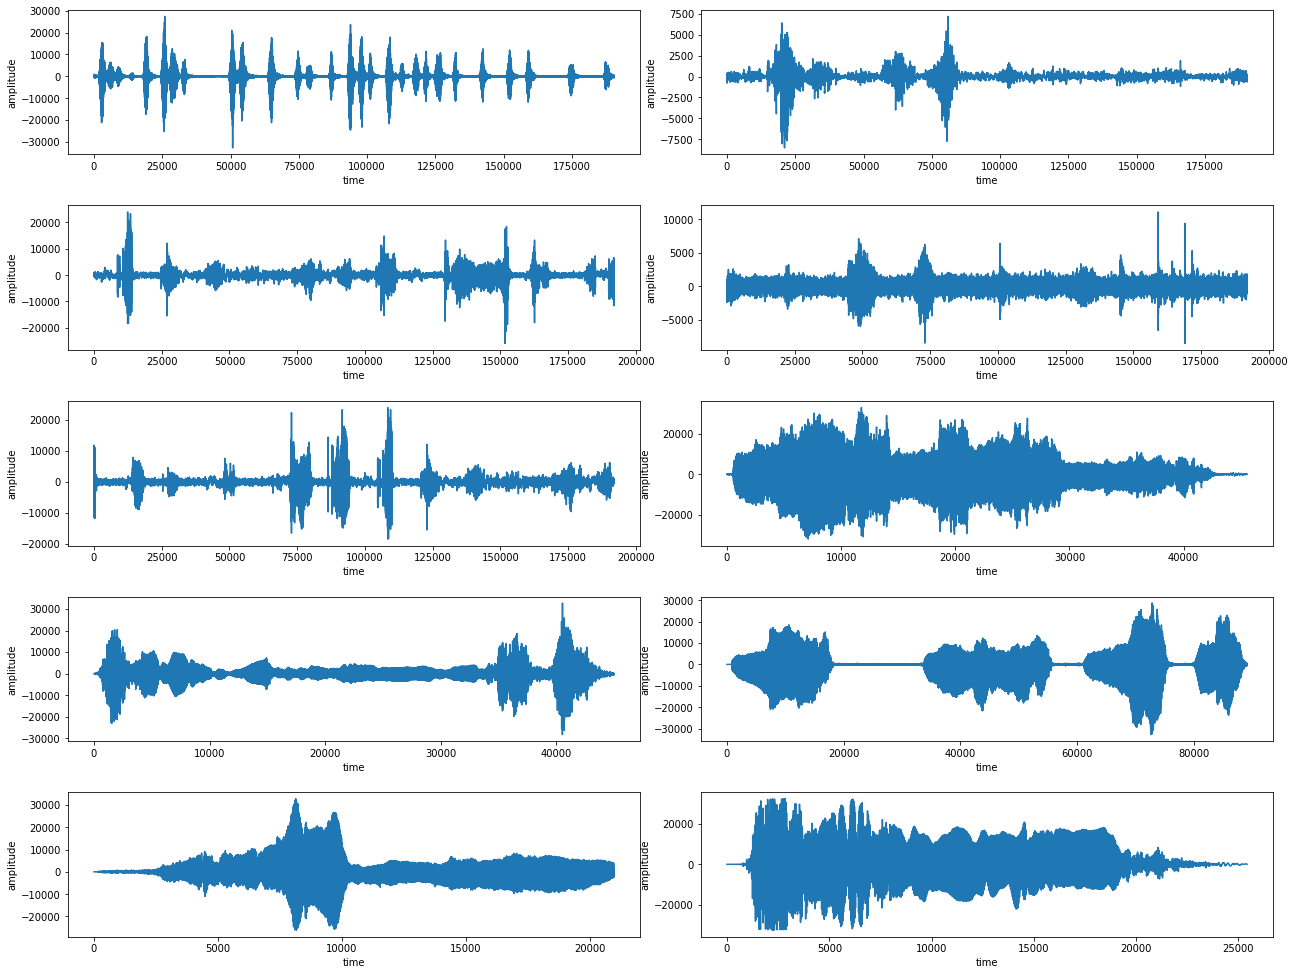

In [ ]:
print(color.BOLD + color.RED + color.UNDERLINE + "\nLooking at sample (1st 10) audio (.wav) files from the X_train data :-\n" + color.END)
fig, axs = plt.subplots(5, 2, figsize=(18,14))
fig.tight_layout(pad=3.0)
tr = 0
for i in range(5):
    for j in range(2):
        axs[i][j].plot(X_train[tr]); axs[i][j].set_xlabel("time"); axs[i][j].set_ylabel("amplitude")
        tr += 1
plt.show()

## **Defining the generator**

This generator is being defined to return batches of n_sample * sample_len.

In [ ]:
def cats_and_dogs_gen(dataset='train', n_samples=20, sample_len=16000): #Will provide dataset as either 'train' or 'test', by choosing between the two
    #n_samples : samples per batch
    #sample_len : size of the samples in a batch
    
    X, y = (X_train, y_train) if dataset is 'train' else (X_test, y_test) #Selecting / choosing between 'train' or 'test'
    
    # Create two huuuges 1D arrays with all the audio waves concatenated one after the other
    # (one for the cats, the other for the dogs)
    X_cat = np.concatenate([_x for _x, _y in zip(X, y) if _y == 0])
    X_dog = np.concatenate([_x for _x, _y in zip(X, y) if _y == 1])
    
    # Apply normalization and mean suppression
    X_cat = preprocessing.scale(X_cat)
    X_dog = preprocessing.scale(X_dog)
    
    for _ in range(int(max(sum(y), len(y) - sum(y)) / n_samples)):
        y_batch = np.zeros(n_samples)
        X_batch = np.zeros((n_samples, sample_len))
        for idx in range(n_samples):
            y_batch[idx] = idx % 2
            _X = X_cat if y_batch[idx] == 0 else X_dog
            x_idx = np.random.randint(len(_X) - sample_len)
            X_batch[idx] = _X[x_idx : x_idx + sample_len]
        
        yield (X_batch.reshape(n_samples, sample_len, 1),
               y_batch.reshape(-1, 1) )
        
# Test the generator here
x, y = next(cats_and_dogs_gen('train'))
print(x.shape, y.shape)

(20, 16000, 1) (20, 1)


# **Defining the model**

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from collections import namedtuple
from tensorflow.python.framework import ops


def build_neural_network():
    '''We build a 10 layer convolutional neural network ending with
    a Global average Pooling layer whose logits are submitted to
    a sigmoid function.
    
    Receptive fied is : U_0 = 1; U_{n+1} = U_n * 2 + 1
    Which is, for 10 layers : 2047
    '''
    ops.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, None, 1])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training = tf.Variable(True,dtype=tf.bool)
    
    nn = tf.layers.conv1d(inputs,
                          filters=10,
                          kernel_size=3,
                          strides=2,
                          activation=tf.nn.relu)
    for _ in range(9):
        nn = tf.layers.conv1d(nn,
                              filters=10,
                              kernel_size=3,
                              strides=2,
                              activation=tf.nn.relu)
        nn = tf.layers.batch_normalization(nn, training=is_training)
    
    # Global average pooling
    nn = tf.reduce_mean(nn, [1])
    
    logits = tf.layers.dense(nn, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
Instructions for updating:
Use keras.layers.Dense instead.


# **Training the model**

In [ ]:
epochs = 100
train_collect = 2
train_print = train_collect * 2

learning_rate_value = 0.01

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        
        # Train
        epoch_loss = []
        epoch_acc = []
        for batch_x, batch_y in cats_and_dogs_gen('train'):
            feed = {model.inputs: batch_x,
                    model.labels: batch_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }
            # Do the training
            batch_loss, _, batch_acc = sess.run([model.cost, model.optimizer, model.accuracy],
                                                feed_dict=feed)
            
            # Accumulate the resulting values
            epoch_loss.append(batch_loss)
            epoch_acc.append(batch_acc)
        
        # Collect epoch losses and accuracies
        x_collect.append(e)
        train_loss_collect.append(np.array(epoch_loss).mean())
        train_acc_collect.append(np.array(epoch_acc).mean())

        print("Epoch: {}/{}".format(e + 1, epochs),
              "Train Loss: {:.4f}".format(np.array(epoch_loss).mean()),
              "Train Acc: {:.4f}".format(np.array(epoch_acc).mean()))
        
        # Validation output
        epoch_loss = []
        epoch_acc = []
        for batch_x, batch_y in cats_and_dogs_gen('test'):
            feed = {model.inputs: batch_x,
                    model.labels: batch_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }
            # Do the training
            batch_loss, _, batch_acc = sess.run([model.cost, model.optimizer, model.accuracy],
                                                feed_dict=feed)
            
            # Accumulate the resulting values
            epoch_loss.append(batch_loss)
            epoch_acc.append(batch_acc)
            
        # Collect epoch losses and accuracies
        valid_loss_collect.append(np.array(epoch_loss).mean())
        valid_acc_collect.append(np.array(epoch_acc).mean())

    saver.save(sess, "./cats_dogs.ckpt")

Epoch: 1/100 Train Loss: 0.7092 Train Acc: 0.5000
Epoch: 2/100 Train Loss: 0.6800 Train Acc: 0.5700
Epoch: 3/100 Train Loss: 0.6480 Train Acc: 0.6600
Epoch: 4/100 Train Loss: 0.4971 Train Acc: 0.8000
Epoch: 5/100 Train Loss: 0.4717 Train Acc: 0.7600
Epoch: 6/100 Train Loss: 0.4693 Train Acc: 0.8000
Epoch: 7/100 Train Loss: 0.4736 Train Acc: 0.8500
Epoch: 8/100 Train Loss: 0.4222 Train Acc: 0.7800
Epoch: 9/100 Train Loss: 0.3948 Train Acc: 0.7900
Epoch: 10/100 Train Loss: 0.4834 Train Acc: 0.7000
Epoch: 11/100 Train Loss: 0.4783 Train Acc: 0.8100
Epoch: 12/100 Train Loss: 0.4434 Train Acc: 0.7700
Epoch: 13/100 Train Loss: 0.4242 Train Acc: 0.8100
Epoch: 14/100 Train Loss: 0.3771 Train Acc: 0.8700
Epoch: 15/100 Train Loss: 0.3177 Train Acc: 0.8500
Epoch: 16/100 Train Loss: 0.5126 Train Acc: 0.7400
Epoch: 17/100 Train Loss: 0.4541 Train Acc: 0.7700
Epoch: 18/100 Train Loss: 0.3608 Train Acc: 0.8600
Epoch: 19/100 Train Loss: 0.3134 Train Acc: 0.8700
Epoch: 20/100 Train Loss: 0.3621 Train A

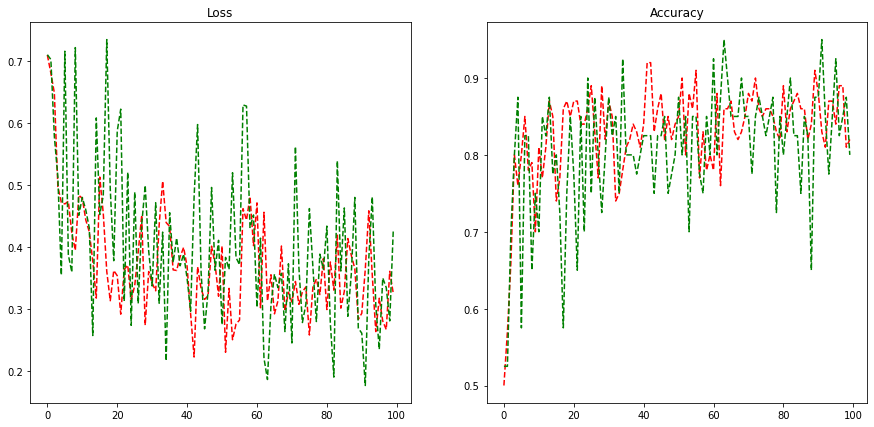

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(x_collect, train_loss_collect, "r--")
axs[0].plot(x_collect, valid_loss_collect, "g--")
axs[0].set_title('Loss')
axs[1].plot(x_collect, train_acc_collect, "r--")
axs[1].plot(x_collect, valid_acc_collect, "g--")
axs[1].set_title('Accuracy')

plt.show()